# Setting Up Department Store in Hyderabd, India

## Table of Contents

* [Introduction](#introduction)
* [Business Problem](#bp)
* [Data Description](#data_discription)
* [Methodolgy](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

Over the years, the goods available for sale to the public have increased in both range and variety and now encompass everything and anything that a customer might possibly need or want.  Today it is possible to purchase clothes, toiletries, cosmetics, gardening materials, sporting goods, home appliances etc etc etc  under one roof i.e the **Department Store**.  However, some stores have become renowned from a certain degree of specialization while others for offering goods at discount prices whereas most stores offer a general discount of prices at particular times of the year.

## Business Problem <a name="bp"></a>

A retail company wants to set up Department store in Hyderabad city. But it is not exactly sure about which Neighbourhood(s) to open the store(s) in. The chosen locations should ideally have a considerable population so that there is more store footfall & near to work centres/residential districts for easier access to a large number of citizens. There are 2 business questions that need to be answered here.

1. Which part (area) of the city should the company open the department store first.

2. Which Neighbourhood(s) would be ideal in that part (as in point 1) setting up such a department store in the city.

Again, the most important point would be, the `area` chosen should have atmost 1 Department store that exists or must have no Department store.


## Target audience

This project is particularly useful to the `Property Developers`, `Investors` and `Retailers` looking to open or invest in a new **Depatmental Store** in the capital of **Telangana** i.e **Hyderabad** in **India**.

## Data Description <a name="data_discription"></a>

In order to solve the business problem, I have decided to use the following data as listed below, which includes the Foursquare Location data API.

• List of neighbourhoods in Hyderabad.

• Geographical co-ordinates data of Neighborhoods in Hyderabad city that I have scraped from `Wikipedia` using the     `BeautifulSoup` which is a pyhton package - reference link : 
  **https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Hyderabad,_India**. This data would be used for collecting the Latitude, Longitude values, for Neighbourhood mapping and helps to display points on Folium based maps.

• Venue data for each Neighbourhood in the city using `Foursquare API`. I included venues within a `2000` metre radius from each    neighbourhood centre. The data helps us to identify similar Neighbourhoods using venues. Also helps in clustering algorithm.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

## Methodology <a name="methodology"></a>

### Part 1: Extracting the required data

#### Web scraping to get the Neighborhood data abd build pandas DataFrame

First let's start with sending the GET requests

In [2]:
data = requests.get("https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Hyderabad,_India").text

In [3]:
# parse data from thee html into beautiful soup object

soup = BeautifulSoup(data, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Category:Neighbourhoods in Hyderabad, India - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"638f7a51-f5a2-4769-b89d-3d477c9c6442","wgCSPNonce":!1,"wgCanonicalNamespace":"Category","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":14,"wgPageName":"Category:Neighbourhoods_in_Hyderabad,_India","wgTitle":"Neighbourhoods in Hyderabad, India","wgCurRevisionId":955880704,"wgRevisionId":955880704,"wgArticleId":3839100,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Neighbourhoods in Telangana","Geography of Hyderabad, India"]

In [4]:
# create a list to store neighborhood data
neighborhoodList = []

# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].find_all('li'):
    neighborhoodList.append(row.text)

In [5]:
# create a new DataFrame from the list
df_neighborhood = pd.DataFrame({'Neighborhood' : neighborhoodList})

df_neighborhood.head()

,Neighborhood
0,A. S. Rao Nagar
1,A.C. Guards
2,Abhyudaya Nagar
3,Abids
4,Adibatla


In [6]:
# printing the number of rows of the dataframe
df_neighborhood.shape

(200, 1)

In [7]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Hyderabad, India'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in df_neighborhood["Neighborhood"].tolist() ]


In [8]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_latlng = pd.DataFrame(coords, columns = ['Latitude', 'Longitude'])

In [9]:
print(df_latlng.shape)

df_latlng.head()

(200, 2)


,Latitude,Longitude
0,17.411200,78.50824
1,17.393001,78.45690
2,17.337650,78.56414
3,17.389800,78.47658
4,17.235790,78.54132


In [10]:
# concat the df of neighborhood & df of latlng
df = pd.concat([df_neighborhood,df_latlng], axis = 1)

In [11]:
df.head()

,Neighborhood,Latitude,Longitude
0,A. S. Rao Nagar,17.411200,78.50824
1,A.C. Guards,17.393001,78.45690
2,Abhyudaya Nagar,17.337650,78.56414
3,Abids,17.389800,78.47658
4,Adibatla,17.235790,78.54132


In [12]:
df.shape

(200, 3)

In [13]:
# get the coordinates of Hyderabad

address = 'Hyderabad, India'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Hyderabad, India {}, {}.'.format(latitude, longitude))

C:\Users\ravi teja\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """


The geograpical coordinate of Hyderabad, India 17.3616079, 78.4746286.


In [14]:
# create map of Hyderabad using latitude and longitude values
map_h = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='darkgreen',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_h)  
    
map_h

### Part 2 : Using the FourSquare API to get Venues in and around the Neighborhoods of Hyderabad

In [16]:
CLIENT_ID = 'BLK4KGDQ2FY214KLR2JGR0QP1TUSZEZD4SKTRX4MG3SMMFTE' 
CLIENT_SECRET = 'RGQO4KD1T2SUBGYUMK4UK10VYFJX40KYXXJ2LNQNYLVVX4SL'
VERSION = '20200704'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
print('VERSION : ' + VERSION)

Your credentails:
CLIENT_ID: BLK4KGDQ2FY214KLR2JGR0QP1TUSZEZD4SKTRX4MG3SMMFTE
CLIENT_SECRET:RGQO4KD1T2SUBGYUMK4UK10VYFJX40KYXXJ2LNQNYLVVX4SL
VERSION : 20200704


In [18]:
# scrip to get the venues with category, latitude, longitude
radius = 2000
LIMIT = 100

venues = []

for lat, long, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url, timeout = 5).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [19]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head(10)

(6450, 7)


,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,A. S. Rao Nagar,17.4112,78.50824,Bawarchi,17.406369,78.497662,Indian Restaurant
1,A. S. Rao Nagar,17.4112,78.50824,Sudharshan Theatre 35mm,17.406530,78.495150,Movie Theater
2,A. S. Rao Nagar,17.4112,78.50824,Subway,17.404173,78.514950,Sandwich Place
3,A. S. Rao Nagar,17.4112,78.50824,Devi 70 MM,17.406329,78.495409,Movie Theater
4,A. S. Rao Nagar,17.4112,78.50824,Baskin-Robbins,17.404311,78.510034,Ice Cream Shop
5,A. S. Rao Nagar,17.4112,78.50824,Cafe Coffee Day,17.423051,78.501520,Coffee Shop
6,A. S. Rao Nagar,17.4112,78.50824,Spencer's,17.412592,78.498400,Convenience Store
7,A. S. Rao Nagar,17.4112,78.50824,Daily Bread,17.403554,78.514961,Café
8,A. S. Rao Nagar,17.4112,78.50824,Crystal Restaurant,17.406608,78.496268,Asian Restaurant
9,A. S. Rao Nagar,17.4112,78.50824,Sandhya 70 MM,17.407053,78.497724,Movie Theater


In [20]:
# checking how many neighborhoods are returned
venues_df.groupby(["Neighborhood"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Neighborhood,,,,,,
A. S. Rao Nagar,21,21,21,21,21,21
A.C. Guards,54,54,54,54,54,54
Abhyudaya Nagar,10,10,10,10,10,10
Abids,81,81,81,81,81,81
Adikmet,21,21,21,21,21,21
Afzal Gunj,47,47,47,47,47,47
Aghapura,58,58,58,58,58,58
"Aliabad, Hyderabad",10,10,10,10,10,10
Alijah Kotla,16,16,16,16,16,16


In [21]:
# finding total number of unique categories
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 168 uniques categories.


In [22]:
#displaying all unique categories
venues_df['VenueCategory'].unique()

array(['Indian Restaurant', 'Movie Theater', 'Sandwich Place',
       'Ice Cream Shop', 'Coffee Shop', 'Convenience Store', 'Café',
       'Asian Restaurant', 'Train Station', 'Flea Market',
       'Light Rail Station', 'Bakery', 'Hyderabadi Restaurant', 'Lounge',
       'Juice Bar', 'South Indian Restaurant', 'Bistro', 'Park',
       'Middle Eastern Restaurant', 'Snack Place', 'Science Museum',
       'Stadium', 'Hotel Bar', 'Vegetarian / Vegan Restaurant',
       'Performing Arts Venue', 'Hotel', 'Pizza Place',
       'Fast Food Restaurant', 'Mobile Phone Shop', 'Electronics Store',
       'Fried Chicken Joint', 'Hookah Bar', 'Department Store',
       'Clothing Store', 'Shoe Store', 'Bookstore', 'Restaurant',
       'Scenic Lookout', 'Dessert Shop', 'Food Truck', 'Chaat Place',
       'Diner', 'Neighborhood', 'Burger Joint', 'Chinese Restaurant',
       'Smoke Shop', 'Breakfast Spot', 'Bar', 'Shopping Mall', 'Food',
       'Multiplex', 'Gaming Cafe', 'Farmers Market',
       'Indie 

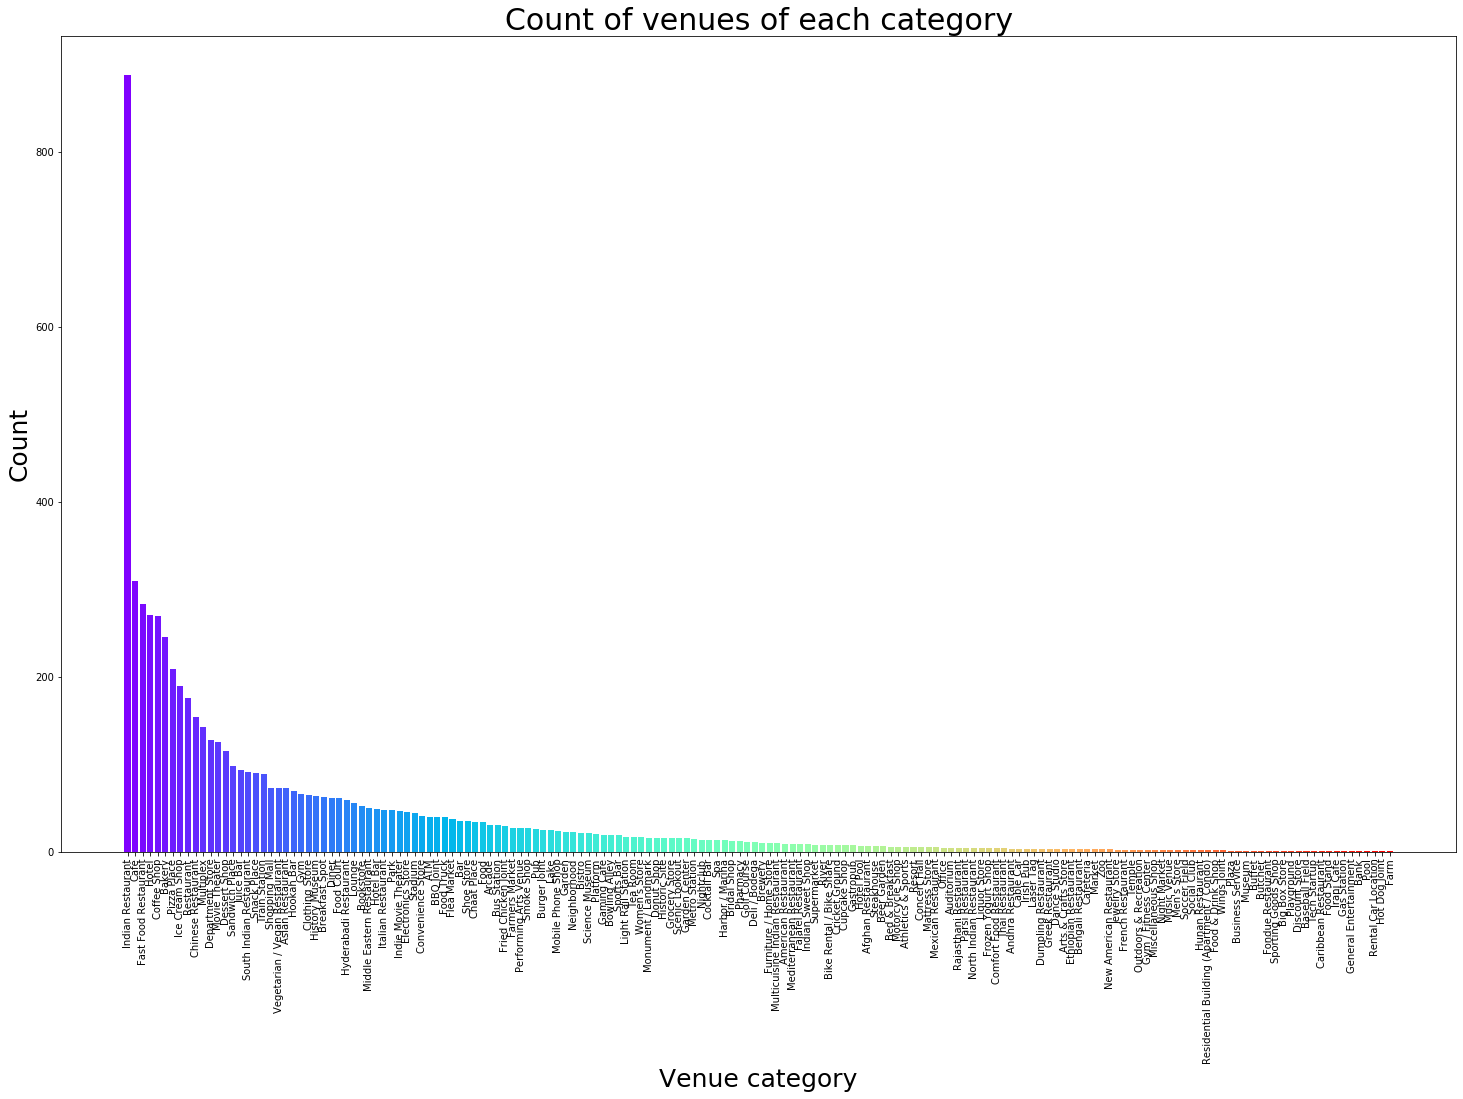

In [23]:
# plotting the histogram for venue vs count of each category

venue_distribution = venues_df['VenueCategory'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (25, 15))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 25)
plt.ylabel("Count", fontsize = 25)
plt.title("Count of venues of each category", fontsize = 30)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

# saving the fig
plt.savefig('histogram_venues.png')

In [24]:
# checking if the Department store returned from unique venues

"Department Store" in venues_df['VenueCategory'].unique()

True

### Part 3 :  Analyzing each Neighborhood <a name="analysis"></a>

In [25]:

# one hot encoding
onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

#add neighborhood column back to data
onehot['Neighborhoods'] = venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

print(onehot.shape)
onehot.head(20)

(6450, 169)


,Neighborhoods,ATM,Afghan Restaurant,American Restaurant,Andhra Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Bed & Breakfast,Beer Garden,Bengali Restaurant,Big Box Store,Bike Rental / Bike Share,Bistro,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Buffet,Burger Joint,Bus Station,Business Service,Butcher,Cable Car,Cafeteria,Café,Caribbean Restaurant,Chaat Place,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Flea Market,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,History Museum,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hunan Restaurant,Hyderabadi Restaurant,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Irani Cafe,Irish Pub,Italian Restaurant,Jewelry Store,Juice Bar,Lake,Laser Tag,Light Rail Station,Liquor Store,Lounge,Market,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Museum,Music Venue,Neighborhood,New American Restaurant,Night Market,Nightclub,North Indian Restaurant,Office,Outdoors & Recreation,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Rajasthani Restaurant,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,River,Sandwich Place,Scenic Lookout,Science Museum,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Social Club,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Tea Room,Tech Startup,Temple,Thai Restaurant,Train Station,Vegetarian / Vegan Restaurant,Wings Joint,Women's Store,Zoo
0,A. S. Rao Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,A. S. Rao Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,A. S. Rao Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,A. S. Rao Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,A. S. Rao Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [26]:
grouped = onehot.groupby(["Neighborhoods"]).sum().reset_index()

# onehot.head()
print(grouped.shape)
grouped

(197, 169)


,Neighborhoods,ATM,Afghan Restaurant,American Restaurant,Andhra Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Bed & Breakfast,Beer Garden,Bengali Restaurant,Big Box Store,Bike Rental / Bike Share,Bistro,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Buffet,Burger Joint,Bus Station,Business Service,Butcher,Cable Car,Cafeteria,Café,Caribbean Restaurant,Chaat Place,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Flea Market,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,History Museum,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hunan Restaurant,Hyderabadi Restaurant,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Irani Cafe,Irish Pub,Italian Restaurant,Jewelry Store,Juice Bar,Lake,Laser Tag,Light Rail Station,Liquor Store,Lounge,Market,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Museum,Music Venue,Neighborhood,New American Restaurant,Night Market,Nightclub,North Indian Restaurant,Office,Outdoors & Recreation,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Rajasthani Restaurant,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,River,Sandwich Place,Scenic Lookout,Science Museum,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Social Club,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Tea Room,Tech Startup,Temple,Thai Restaurant,Train Station,Vegetarian / Vegan Restaurant,Wings Joint,Women's Store,Zoo
0,A. S. Rao Nagar,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,A.C. Guards,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,1,0,0,2,2,9,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,3,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,Abhyudaya Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Abids,0,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,3,0,1,4,1,0,2,0,0,0,0,0,0,0,2,3,1,0,0,0,0,0,0,0,1,4,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,1,0,0,0,5,10,0,1,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,3,0,1,1,1,2,1,1,2,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,Adikmet,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [27]:
# finding total numbers of department stores in Hyderabad

x = len((grouped[grouped["Department Store"] > 0]))
print(f'The total number of Department Store present in Hyderabad are : {x}')

The total number of Department Store present in Hyderabad are : 91


### Creating seperate DataFrame for Department Store

In [28]:
d_s = grouped[["Neighborhoods","Department Store"]]

d_s.head()

,Neighborhoods,Department Store
0,A. S. Rao Nagar,0
1,A.C. Guards,2
2,Abhyudaya Nagar,1
3,Abids,2
4,Adikmet,0


### Part 4 : Now Clustering the Neighborhoods

In [29]:
# setting the n_clusters to 3
kclusters = 3

clustering = d_s.drop(["Neighborhoods"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 2, 0, 2, 1, 0, 0, 1, 1, 1])

In [30]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood
merged = d_s.copy()

# add clustering labels
merged["Cluster Labels"] = kmeans.labels_

In [31]:
merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
merged.head(10)

,Neighborhood,Department Store,Cluster Labels
0,A. S. Rao Nagar,0,1
1,A.C. Guards,2,2
2,Abhyudaya Nagar,1,0
3,Abids,2,2
4,Adikmet,0,1
5,Afzal Gunj,1,0
6,Aghapura,1,0
7,"Aliabad, Hyderabad",0,1
8,Alijah Kotla,0,1
9,Allwyn Colony,0,1


In [32]:
# merging the above dataframe with Latitude and longitude
merged['Latitude'] = df['Latitude']
merged['Longitude'] = df['Longitude']
merged.head() # check the last columns!

,Neighborhood,Department Store,Cluster Labels,Latitude,Longitude
0,A. S. Rao Nagar,0,1,17.411200,78.50824
1,A.C. Guards,2,2,17.393001,78.45690
2,Abhyudaya Nagar,1,0,17.337650,78.56414
3,Abids,2,2,17.389800,78.47658
4,Adikmet,0,1,17.235790,78.54132


In [33]:
# sorting the results by Cluster Labels

print(merged.shape)
merged.sort_values(["Cluster Labels"], inplace=True)
merged

(197, 5)


,Neighborhood,Department Store,Cluster Labels,Latitude,Longitude
196,Shanker Mutt,1,0,17.482160,78.323000
71,Hasmathpet,1,0,17.417120,78.543500
69,Habsiguda,1,0,17.362590,78.477270
64,Goshamahal,1,0,17.365000,78.526180
146,Nalgonda 'X' Roads,1,0,17.433510,78.566730
147,Nallakunta,1,0,17.609930,78.491220
59,Film Nagar,1,0,17.453330,78.430340
57,"Fateh Nagar, Hyderabad",1,0,17.382838,78.558356
149,"Nampally, Hyderabad",1,0,17.375379,78.498487
151,Nanalnagar,1,0,17.423410,78.515340


In [34]:
# maximum and minimum Department stores in each neighborhood
maxx = merged['Department Store'].max()
minn = merged['Department Store'].min()

print(f'There are maximum {maxx} Department Store and minimum {minn} Department Store in Neighborhoods of Hyderabad ')

There are maximum 3 Department Store and minimum 0 Department Store in Neighborhoods of Hyderabad 


### Examine the clusters

Cluster - 0

In [35]:
merged.loc[merged['Cluster Labels'] == 0]

,Neighborhood,Department Store,Cluster Labels,Latitude,Longitude
196,Shanker Mutt,1,0,17.482160,78.323000
71,Hasmathpet,1,0,17.417120,78.543500
69,Habsiguda,1,0,17.362590,78.477270
64,Goshamahal,1,0,17.365000,78.526180
146,Nalgonda 'X' Roads,1,0,17.433510,78.566730
147,Nallakunta,1,0,17.609930,78.491220
59,Film Nagar,1,0,17.453330,78.430340
57,"Fateh Nagar, Hyderabad",1,0,17.382838,78.558356
149,"Nampally, Hyderabad",1,0,17.375379,78.498487
151,Nanalnagar,1,0,17.423410,78.515340


Cluster - 1

In [36]:
merged.loc[merged['Cluster Labels'] == 1]

,Neighborhood,Department Store,Cluster Labels,Latitude,Longitude
129,"Mehboob ki Mehendi, Hyderabad",0,1,17.447770,78.508730
128,Meerpet–Jillelguda,0,1,17.401390,78.391630
125,Manikonda,0,1,17.447370,78.535200
123,Mallapur,0,1,17.374930,78.515670
157,Noorkhan Bazar,0,1,17.369639,78.476801
169,Purana pul,0,1,17.394870,78.470760
183,S. R. Nagar,0,1,17.355540,78.497560
158,Old Neredmet,0,1,17.477175,78.528480
150,Nanakramguda,0,1,17.397490,78.502380
187,Sainikpuri,0,1,17.466430,78.535650


Cluster - 2

In [37]:
merged.loc[merged['Cluster Labels'] == 2]

,Neighborhood,Department Store,Cluster Labels,Latitude,Longitude
97,Kondapur,3,2,17.354960,78.470290
12,Ameerpet,2,2,17.385820,78.518360
186,Saifabad,2,2,17.328450,78.538380
99,"Koti, Hyderabad",2,2,17.533180,78.481020
189,Sanghi Nagar,3,2,17.405390,78.471380
116,Madhapur,2,2,17.525910,78.376330
180,"Red Hills, Hyderabad",3,2,17.432250,78.491440
3,Abids,2,2,17.389800,78.476580
1,A.C. Guards,2,2,17.393001,78.456900
100,"Krishna Nagar, Hyderabad",2,2,17.466600,78.356850


### Visualizing the clusters on the map using Folium

In [40]:
Hyderabad_map = folium.Map(location = [latitude, longitude], zoom_start = 10)
color_map = { 0: 'green', 1: 'red', 2:'yellow'}

# add venues to the map
markers_colors = []
for d_s, neighborhood, cluster, latitude, longitude in zip(merged['Department Store'], 
                                                        merged['Neighborhood'], 
                                                        merged['Cluster Labels'], 
                                                        merged['Latitude'], 
                                                        merged['Longitude']):
    label = folium.Popup(str(neighborhood) + ', ' + str(d_s) + ' Departmental Store(s)' + ', ' + 'Cluster - ' + str(cluster), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = color_map[cluster],
        fill = True,
        fill_color = color_map[cluster],
        fill_opacity = 0.7).add_to(Hyderabad_map)


Hyderabad_map

# saving the map
Hyderabad_map.save('Hyd_clusters.html')

In [41]:
Hyderabad_map

## Results and Discussion <a name="results"></a> 

Based on our analysis above, we can draw a number of conclusions that will be useful to aid property developers and investors for setting up of the `Department Store`.

After collecting data from the **Wikipedia** (data of neighborhoods) & **Foursquare** (data of venues) , we got a list of 168 different venues. However, as we want to only focus on the data of `Department Store`, we created a seperate DataFrame for the data of department stores.

We identified that from the data, there are `91` total department stores in central Hyderabad. Also after further analysis we find that there are `atmost 3` department stores in some of the neighborhoods and some doesn't even have one. 

Finally, we had seperated the neighborhoods into three Cluster with the help of `K-means` which is an unsupervised Machine Learning Algorithm.

1. `Cluster - 0` : Consists of neighborhoods with atmost 1 Department Store.
2. `Cluster - 1` : Consists of neighborhoods with no Department store.
3. `Cluster - 2` : Consists of neighborhoods with atmost 3 Department Store.


## Conclusion <a name="conclusion"></a>

A good number of **Deparment Stores** are concentrated in the central area of Hyderabad city, with the highest number in `Cluster - 2` and moderate number in `Cluster-0`. This represents a great opportunity and high potential areas to open new department store as there is very little to no competition from existing stores. Meanwhile, department stores in Cluster - 2 are likely suffering from intense competition due to oversupply and high concentration of stores. Therefore, this project recommends property developers to capitalize on these findings to open new department store in neighbourhoods in `Cluster - 1` with little to no competition. Property developers with unique selling propositions to stand out from the competition can also open new department store in neighbourhoods in Cluster - 0 with moderate competition. Lastly, `Property Developers`, `Investors` and other `Retailers` are advised to avoid neighbourhoods in Cluster - 2 which already have a high concentration of department stores and suffering from intense competition.

